# <u>Lab 5 / Project</u>

In [1]:
#importing modules
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
#reading data into a dataframe
df = pd.read_csv('maize_major_yield.csv')
total_raw_rows = str(len(df))
print('The number of rows in the raw data set is: ' + total_raw_rows + '.')

#getting rid of outliers (anything outside of 3 standard deviations is considered an outlier)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
total_cleaned_rows = str(len(df))
print('The number of rows in the cleaned data set is: ' + total_cleaned_rows + '.')

print('The number of rows removed from the raw data set is: ' + str(int(total_raw_rows) - int(total_cleaned_rows)) + '.')

#making a copy of the original
df_duplicate = df.copy()

The number of rows in the raw data set is: 31744.
The number of rows in the cleaned data set is: 26498.
The number of rows removed from the raw data set is: 5246.


## <u>Exploration of the Target Variable:</u>

#### Looking at the statistics of the yield values for the whole dataset.

In [3]:
#creating a dataframe for only the yield
yield_df = df_duplicate['yield']

#printing statistics
print('The minimum yield is: ' + str(round(yield_df.min(), 2)) + ' tonnes per hectare.')
print('The maximum yield is: ' + str(round(yield_df.max(), 2)) + ' tonnes per hectare.')
print('The mean yield is: ' + str(round(yield_df.mean(), 2)) + ' tonnes per hectare.')
print('The standard deviation of the yield is: ' + str(round(yield_df.std(), 2)) + ' tonnes per hectare.')

The minimum yield is: 0.0 tonnes per hectare.
The maximum yield is: 14.62 tonnes per hectare.
The mean yield is: 3.46 tonnes per hectare.
The standard deviation of the yield is: 3.36 tonnes per hectare.


## <u>Data Visualisations:</u>

#### Visualisation of Average Yield Against Year:

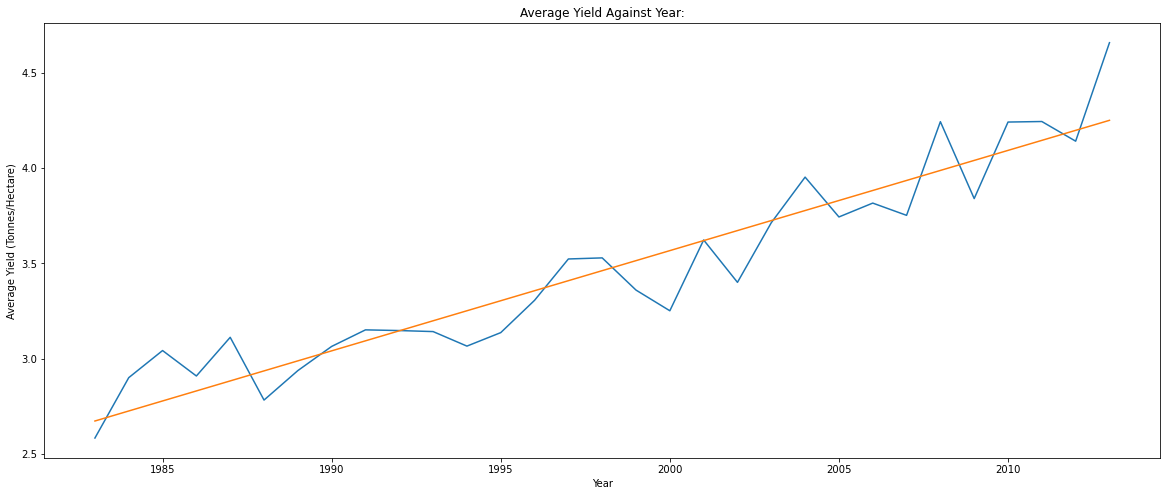

In [4]:
#getting a dataframe of years
year_df = df_duplicate['year'].to_numpy()
individual_years = np.unique(year_df)
years_mean_dict = {}

#going through each year and getting the average yield
for year in individual_years:
    yields = df_duplicate.loc[df_duplicate['year'] == year, 'yield']
    years_mean_dict[year] = yields.mean()

#sorting all of the values recorded for each year
sorted_dict = dict(sorted(years_mean_dict.items(), key=lambda item: item[0]))

x_values = []
y_values = []

#finding the year and yield and storing them in 2 different lists
for key, value in sorted_dict.items():
    x_values.append(key)
    y_values.append(value)
    
x_bestfit = np.array(x_values)
y_bestfit = np.array(y_values)
m, b = np.polyfit(x_bestfit, y_bestfit, 1)

#plotting yield against year
plt.figure(figsize=[20,8])
plt.plot(x_values, y_values)
plt.plot(x_bestfit, m*x_bestfit + b)
plt.title('Average Yield Against Year:')
plt.xlabel('Year')
plt.ylabel('Average Yield (Tonnes/Hectare)')

plt.savefig('Average Yield Against Year.png', transparent=False)
plt.show()

From the graph above, the conclusion that can be made is that there has been a steady increase in the average yield as time went on and that there is a positive correlation between the average yield and the year.

#### Visualisation of Average Yield Against Rainfall

Comparison of the yield against rainfall for 1983 and 2013 to allow for a comparison of the relationship over the course of 30 years.

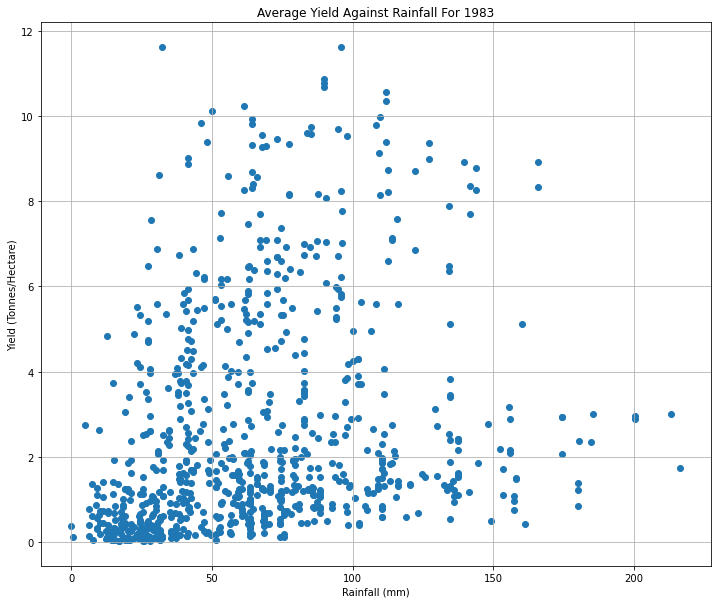

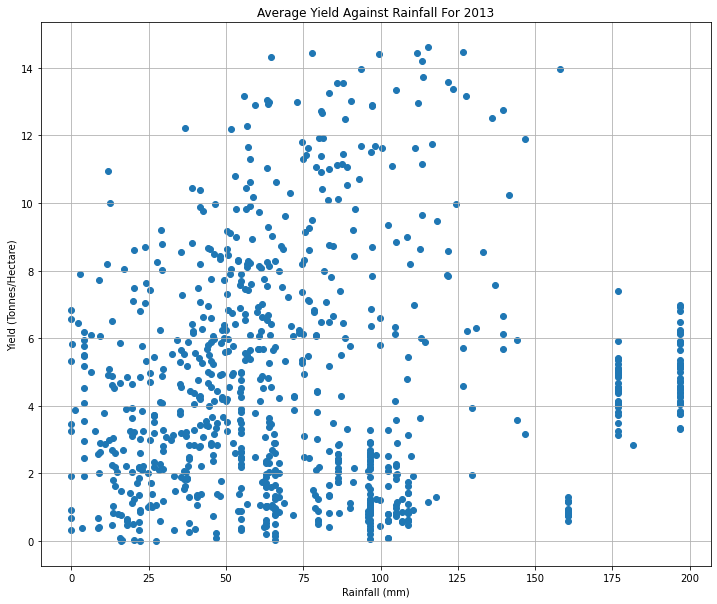

In [5]:
#getting a dataframe for the year 1983 and getting the average yields for that year
df_1983 = df_duplicate.loc[df_duplicate['year'] == 1983]
df_1983_data = df_1983[df_1983.columns[df_1983.columns.to_series().str.contains('rain')]]
average = df_1983_data.mean(axis=1)
yields = df_1983['yield']

#plotting a graph for the 1983 data
plt.figure(figsize=[12,10])
plt.grid(True)
plt.title('Average Yield Against Rainfall For 1983')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.scatter(average, yields)
plt.show()


#getting a dataframe for the year 2013 and getting the average yields for that year
df_2013 = df_duplicate.loc[df_duplicate['year'] == 2013]
df_2013_data = df_2013[df_2013.columns[df_2013.columns.to_series().str.contains('rain')]]
average = df_2013_data.mean(axis=1)
yields = df_2013['yield']

#plotting a graph for the 1983 data
plt.figure(figsize=[12,10])
plt.grid(True)
plt.title('Average Yield Against Rainfall For 2013')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.scatter(average, yields)
plt.show()

The 2 scatter plots above have been plotted to show if there is any noticeable difference between the average yield against rainfall for the years 1983 and 2013.

## <u>Data Preparation:</u>

### Normalising The Data Set:

In [6]:
#creating a dataframe of normalized data
normalize_df = df_duplicate.to_numpy()
df_KNN = normalize_df.copy()

#going through each data point and normalizing it (excluding the year)
for i in range(1, len(normalize_df[0])):
    normalize_df[:,i] = (normalize_df[:,i] - np.mean(normalize_df[:,i])) / np.std(normalize_df[:,i])


df = pd.DataFrame(normalize_df)
df.columns = df_duplicate.columns.values

df

,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature,yield
0,1983.0,-0.771169,-1.295743,-1.195355,-0.846516,-1.347193,-1.390759,-0.948747,-1.038500,-1.014004,...,-0.898424,-0.850879,-0.976457,-0.901654,-1.142649,-1.100511,-0.766340,-1.171049,-1.101286,-0.028584
1,1983.0,-0.805892,1.109767,0.959782,0.683577,1.045669,0.798046,-0.902171,1.042969,0.764471,...,-0.855935,0.553247,0.228969,-0.916505,0.957683,0.631399,-0.389075,1.003923,0.775201,-0.863860
2,1983.0,-0.805892,0.933004,1.078686,-0.444849,1.184504,1.317288,-0.806281,1.329048,1.419184,...,0.720261,1.241545,1.046936,1.729694,1.268077,1.155921,-0.738881,1.144510,1.035386,-0.823333
3,1983.0,2.499690,1.063655,0.878036,0.847467,1.013002,0.829999,1.774532,1.121888,0.803558,...,0.677772,1.131417,1.262190,4.073470,1.143920,1.096541,1.438750,1.070081,0.917120,-0.700560
4,1983.0,0.721898,0.933004,1.160433,-0.713522,0.800666,1.253382,-0.176146,0.530001,1.008767,...,-0.595520,0.250397,0.917783,-0.349462,0.709368,1.066851,0.470516,0.797176,0.901351,-0.758073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26493,2013.0,0.478841,0.810039,0.930056,2.361439,0.849666,0.829999,1.673163,0.628648,0.490859,...,0.527005,0.332992,0.300720,1.500177,0.699022,0.740262,1.934208,0.912954,0.932889,0.007474
26494,2013.0,-0.614918,-0.365817,-0.749464,-0.773974,-0.130345,-0.160555,-0.381625,-0.012562,-0.114995,...,0.085671,-0.327773,-0.890355,-0.627583,-0.087310,-0.645266,-0.306698,-0.459842,-0.801679,0.862716
26495,2013.0,-0.581353,-0.942218,-0.630560,0.015925,-1.012356,-0.767669,-0.918610,-1.008905,-0.427694,...,-0.849082,-1.112432,-0.445496,-0.740992,-1.184035,-0.843199,-0.757983,-1.220669,-0.825332,-0.137053
26496,2013.0,-0.131118,0.802354,1.004371,1.550047,0.735332,0.782069,0.048510,0.352435,0.481088,...,0.119936,0.043907,0.616427,0.811625,0.554171,0.670986,-0.268494,0.954304,1.232496,0.878212


### PCA Reduction:

In [7]:
#use sklearn PCA
from sklearn.decomposition import PCA

#create a new dataframe and fit it
PCA_df = df.copy().to_numpy()
PCA_df2 = PCA_df[:,:-1]
pca = PCA().fit(PCA_df2.data)

print('The number of features we have before PCA reduction is ' + str(len(np.cumsum(pca.explained_variance_ratio_))) + '.')

The number of features we have before PCA reduction is 37.


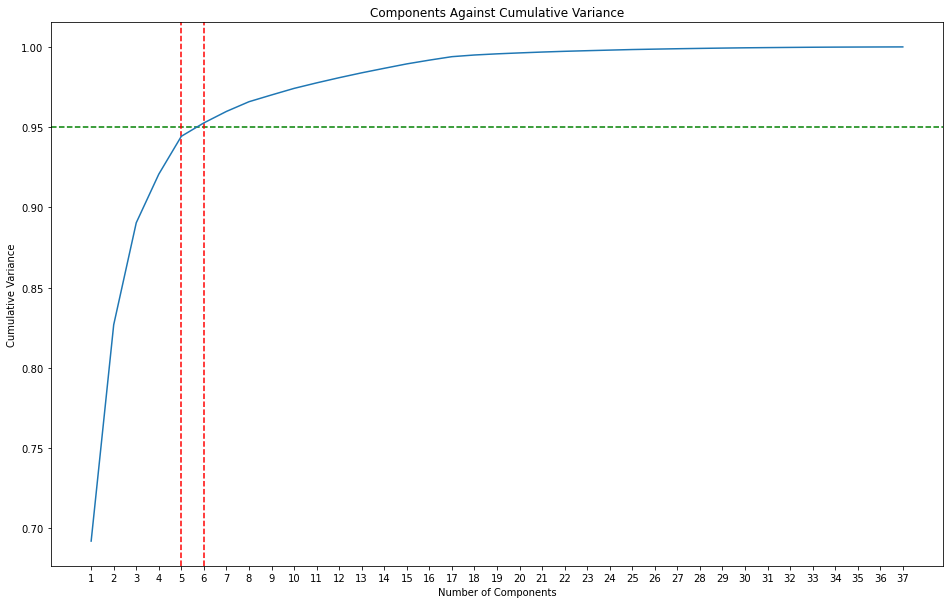

In [8]:
#plotting the variance against the number of components chosen
plt.figure(figsize=[16,10])
plt.title("Components Against Cumulative Variance")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.xticks(np.arange(PCA_df2.shape[1]), np.arange(1, PCA_df2.shape[1]+1))

#checking for the minimum number of components that contains 95% of the original data
plt.axhline(y = 0.95, color = 'g', linestyle = '--')
plt.axvline(x=5, color='r', linestyle = '--')
plt.axvline(x=4, color='r', linestyle = '--')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [9]:
#going through the number of components and manually checking the variance
for i in range(20):
    pca = PCA(n_components = i)
    x_reduced = pca.fit_transform(PCA_df2.data)
    
    #once i has been found stop
    if np.sum(pca.explained_variance_ratio_) > 0.95:
        break

#print the component and it's associated variance
print('The number of components is ' + str(i) + '.')
print('The variance with this number of components is ' + str(np.sum(pca.explained_variance_ratio_)) + '.')

#creating a new dataframe with the reduced data
X_reduced_df = pd.DataFrame(x_reduced)
Y_df = pd.DataFrame(PCA_df[:,-1])
Y_df = Y_df.rename(columns = {0: 'yield'})

final_df = pd.concat([X_reduced_df, Y_df], axis = 1)

The number of components is 6.
The variance with this number of components is 0.9526521072239322.


### Doing Splits:

Creating the training, validation and testing sets with a 60/20/20 split respectively.

In [10]:
#setting percentages for the train, validation and test splits
split_ratios = np.array([0.6, 0.2, 0.2])

# shuffle the input
df = final_df.sample(frac = 1, random_state = 10)

# split into 3 different splits
train_split, val_split, test_split = np.array_split(df, (split_ratios[:-1].cumsum() * len(df)).astype(int))

#printing out the values for each
print('The training set size is: ', (len(train_split)))
print('The validation set size is: ', (len(val_split)))
print('The test set size is: ', (len(test_split)))

The training set size is:  15898
The validation set size is:  5300
The test set size is:  5300


In [11]:
#setting training, validation and test variables for X and Y
X_train = train_split.drop('yield', axis = 1).to_numpy()
X_val = val_split.drop('yield', axis = 1).to_numpy()
X_test = test_split.drop('yield', axis = 1).to_numpy()

Y_train = train_split['yield'].to_numpy()
Y_val = val_split['yield'].to_numpy()
Y_test = test_split['yield'].to_numpy()

## <u> First Model: Linear Regression:</u>

Implementing the linear regressions algorithm.

In [12]:
#doing a linear regression
beta_hat = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)
#creating a function to calculate the mean squared error of the 2 input variables
def lin_reg(X_var, Y_var):
    y_hat = np.round(X_var.dot(beta_hat), 3)
    mean_squared_error = np.square(np.subtract(Y_var, y_hat)).mean()
    return mean_squared_error

#printing the results
print('The MSE value running a LE on the training data is: ' + str(round(lin_reg(X_train, Y_train), 5)))
print('The MSE value running a LE on the test data is: ' + str(round(lin_reg(X_test, Y_test), 5)))

The MSE value running a LE on the training data is: 0.62706
The MSE value running a LE on the test data is: 0.63131


## <u> Second Model: Regression Forest:</u>

Implementing the regression forest algorithm.

In [13]:
def find_split(x, y):
    """Given a dataset and its target values, this finds the optimal combination
    of feature and split point that gives the maximum information gain."""
    
    # Need the starting entropy so we can measure improvement...
    start_entropy = calculate_entropy(y)
    
    # Best thus far, initialised to a dud that will be replaced immediately...
    best = {'residual' : -np.inf}
    
    # Loop every possible split of every dimension...
    for i in range(x.shape[1]):
        for split in np.unique(x[:,i]):
            
            left_indices = np.where(x[:,i] <= split)[0].tolist()
            right_indices = np.where(x[:,i] > split)[0].tolist()
            
            total_left = len(left_indices)
            total_right = len(right_indices)
            total = total_left + total_right
            
            fraction_of_right = total_right / total
            fraction_of_left = total_left / total
            
            entropy_of_left_split = calculate_entropy(y[left_indices])
            entropy_of_right_split = calculate_entropy(y[right_indices])
            
            infogain = start_entropy - (entropy_of_left_split*fraction_of_left) - (entropy_of_right_split*fraction_of_right)

            if residual < best['residual']:
                best = {'feature' : i,
                        'split' : split,
                        'residual' : infogain, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices}
                
    return best

In [14]:
def build_tree(x, y, max_depth = 2):
    # Check if either of the stopping conditions have been reached. If so generate a leaf node...
    if max_depth==1 or (y==y[0]).all():
        # Generate a leaf node...
        average = np.mean(y)
        average = average.round(3)
        return {'leaf': True, 'predict': average}
    
    else:
        move = find_split(x, y)
        
        left = build_tree(x[move['left_indices'],:], y[move['left_indices']], max_depth - 1)
        right = build_tree(x[move['right_indices'],:], y[move['right_indices']], max_depth - 1)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'residual' : move['var'],
                'left' : left,
                'right' : right}

In [15]:
def predict(tree, samples):
    """Predicts every entry of a data matrix."""
    ret = np.empty(samples.shape[0], dtype=float)
    ret.fill(0)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['predict']
        
        else:
            going_left = samples[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret

## <u> Third Model: Gaussian Process:</u>

Implementing the Gaussian Process algorithm.

## <u> Fourth Model: Neural Network:</u>

Implementing a Neural Network.

In [16]:
#import modules needed to implement a neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
def plot_NN_result(data):
    
    val_df = pd.DataFrame(data.history)
    val_df['epoch'] = data.epoch
    plt.figure(figsize=[16,10])
    plt.plot(val_df['epoch'], val_df['loss'], label = 'Error For Training Data')
    plt.plot(val_df['epoch'], val_df['val_mse'], label = 'Error For Validation Data')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.ylim([0.25, 0.5])
    plt.legend()

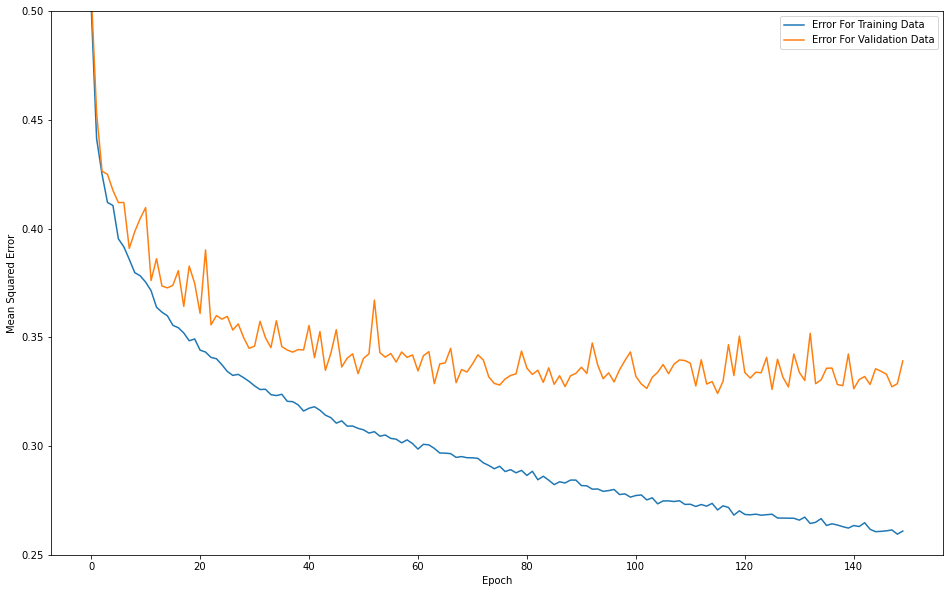

In [26]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = tf.nn.relu))
model.add(Dense(64, activation = tf.nn.relu))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-6, patience = 100, verbose = 1, mode = 'auto', restore_best_weights = True)
previous_values = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks = [monitor], verbose = 0, epochs = 160)
plot_NN_result(previous_values)

Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping


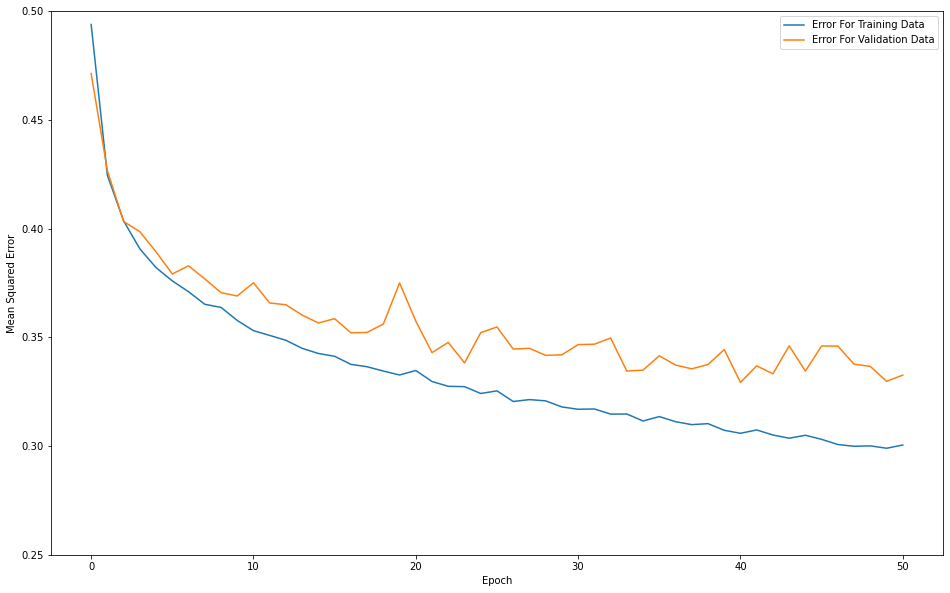

In [28]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = tf.nn.relu))
model.add(Dense(64, activation = tf.nn.relu))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-6, patience = 10, verbose = 1, mode = 'auto', restore_best_weights = True)
optimized_values = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks = [monitor], verbose = 0, epochs = 160)
plot_NN_result(optimized_values)

In [19]:
#running the neural network on my 
loss, MSE = model.evaluate(X_test, Y_test)
loss_val = round(loss, 5)
print('The MSE for value running a NN is: ' + str(loss_val) + '.')

166/166 [==============================] - 0s 289us/step - loss: 0.3239 - mse: 0.3239
The MSE for value running a NN is: 0.32394.
